<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_cluster_groupwise_0_1_0_9_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.1_0.9'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.154272,79.239036,32.366047,0.300123,206.059477,205.908829,0.150648
1,0.0,1.0,86.147481,52.666501,98.148828,0.257951,247.220761,246.846781,0.373980
2,0.0,2.0,41.308105,88.279461,82.604398,-0.795970,221.395994,222.202889,-0.806895
3,0.0,3.0,92.798209,83.699854,31.357337,-0.564210,217.291191,218.032178,-0.740986
4,0.0,4.0,98.982709,93.850613,97.231883,-0.350520,299.714685,300.114561,-0.399875
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.505427,44.264832,86.727340,-0.348481,166.149118,166.629575,-0.480457
59996,999.0,56.0,25.774929,95.393020,60.374881,1.002727,192.545558,192.081302,0.464255
59997,999.0,57.0,55.205478,37.994521,78.005719,-0.922139,180.283579,181.033470,-0.749890
59998,999.0,58.0,53.560131,49.779453,69.181319,2.154825,184.675729,182.466509,2.209220


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.154272  79.239036  32.366047  ...  206.059477  205.908829  0.150648
      1.0    86.147481  52.666501  98.148828  ...  247.220761  246.846781  0.373980
      2.0    41.308105  88.279461  82.604398  ...  221.395994  222.202889 -0.806895
      3.0    92.798209  83.699854  31.357337  ...  217.291191  218.032178 -0.740986
      4.0    98.982709  93.850613  97.231883  ...  299.714685  300.114561 -0.399875
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   25.505427  44.264832  86.727340  ...  166.149118  166.629575 -0.480457
      56.0   25.774929  95.393020  60.374881  ...  192.545558  192.081302  0.464255
      57.0   55.205478  37.994521  78.005719  ...  180.283579  181.033470 -0.749890
      58.0   53.560131  49.779453  69.181319  ...  184.675729  182.466509  2.209220
      59.0   23.624446  90.317886  83.343565  ...  208.668181  207.748006  0.920176

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.154272  79.239036  32.366047  ...  206.059477  205.908829  0.150648
      1.0    86.147481  52.666501  98.148828  ...  247.220761  246.846781  0.373980
      2.0    41.308105  88.279461  82.604398  ...  221.395994  222.202889 -0.806895
      3.0    92.798209  83.699854  31.357337  ...  217.291191  218.032178 -0.740986
      4.0    98.982709  93.850613  97.231883  ...  299.714685  300.114561 -0.399875
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   25.505427  44.264832  86.727340  ...  166.149118  166.629575 -0.480457
      56.0   25.774929  95.393020  60.374881  ...  192.545558  192.081302  0.464255
      57.0   55.205478  37.994521  78.005719  ...  180.283579  181.033470 -0.749890
      58.0   53.560131  49.779453  69.181319  ...  184.675729  182.466509  2.209220
      59.0   23.624446  90.317886  83.343565  ...  208.668181  207.748006  0.920176

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.154272,79.239036,32.366047,0.300123,206.059477,205.908829,0.150648
1,0.0,1.0,86.147481,52.666501,98.148828,0.257951,247.220761,246.846781,0.373980
2,0.0,2.0,41.308105,88.279461,82.604398,-0.795970,221.395994,222.202889,-0.806895
3,0.0,3.0,92.798209,83.699854,31.357337,-0.564210,217.291191,218.032178,-0.740986
4,0.0,4.0,98.982709,93.850613,97.231883,-0.350520,299.714685,300.114561,-0.399875
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.505427,44.264832,86.727340,-0.348481,166.149118,166.629575,-0.480457
59996,999.0,56.0,25.774929,95.393020,60.374881,1.002727,192.545558,192.081302,0.464255
59997,999.0,57.0,55.205478,37.994521,78.005719,-0.922139,180.283579,181.033470,-0.749890
59998,999.0,58.0,53.560131,49.779453,69.181319,2.154825,184.675729,182.466509,2.209220


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.154272  79.239036  32.366047  ...  206.059477  205.908829  0.150648
      1.0    86.147481  52.666501  98.148828  ...  247.220761  246.846781  0.373980
      2.0    41.308105  88.279461  82.604398  ...  221.395994  222.202889 -0.806895
      3.0    92.798209  83.699854  31.357337  ...  217.291191  218.032178 -0.740986
      4.0    98.982709  93.850613  97.231883  ...  299.714685  300.114561 -0.399875
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   25.505427  44.264832  86.727340  ...  166.149118  166.629575 -0.480457
      56.0   25.774929  95.393020  60.374881  ...  192.545558  192.081302  0.464255
      57.0   55.205478  37.994521  78.005719  ...  180.283579  181.033470 -0.749890
      58.0   53.560131  49.779453  69.181319  ...  184.675729  182.466509  2.209220
      59.0   23.624446  90.317886  83.343565  ...  208.668181  207.748006  0.920176

[60000 rows x 7 columns]

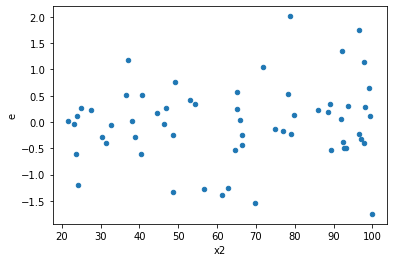

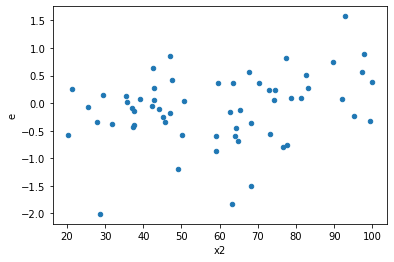

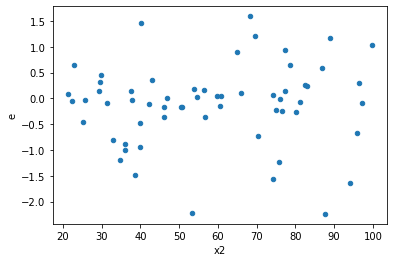

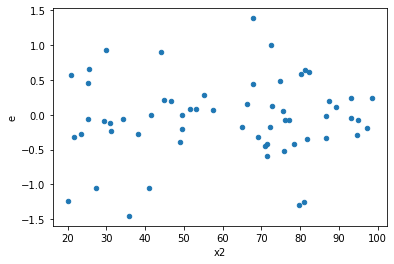

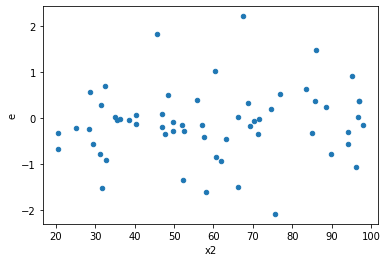

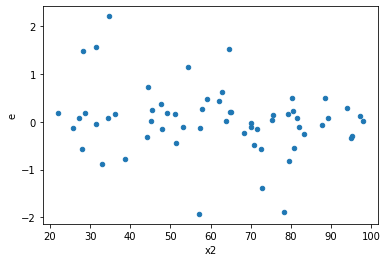

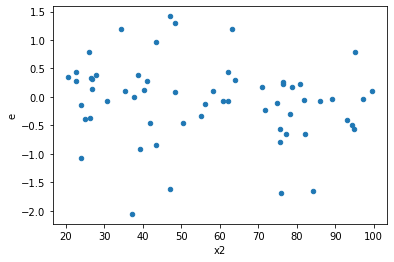

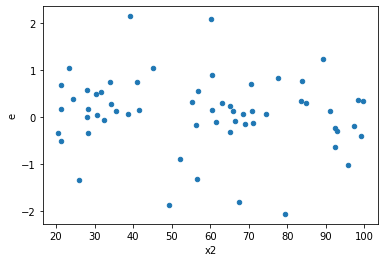

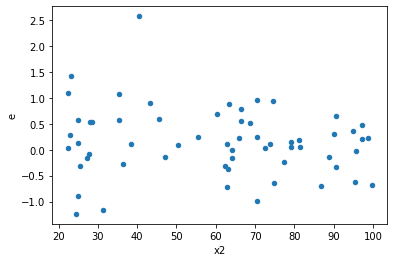

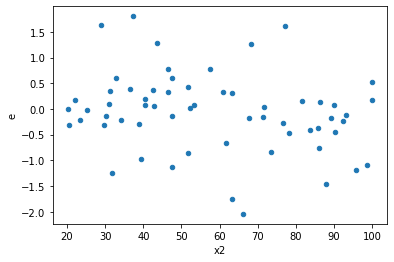

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,22.0,32.0,4.61877386443233,23.003848790475338,0.20994426656510592,0.7188702747023543,3.424100531363761,0.0015783286654831308,0.9992108356672584,0.0007891643327415654,Reject005=0 : Heteroscedasticity
4.0,28.0,26.0,6.019033868671608,6.35599755754362,0.21496549530970027,0.24446144452090846,1.1372124822577383,0.7447270885306341,0.627636455734683,0.37236354426531704,Reject005=1 : Homoscedasticity
5.0,30.0,24.0,12.156860416729453,10.834499015751224,0.40522868055764844,0.45143745898963433,1.1140313621641895,0.7939392704057133,0.6030303647971433,0.39696963520285666,Reject005=1 : Homoscedasticity
9.0,26.0,28.0,5.801495578011065,20.972056155899878,0.22313444530811788,0.7490020055678528,3.3567296368500363,0.0022604880553787066,0.9988697559723106,0.0011302440276893533,Reject005=0 : Heteroscedasticity
10.0,27.0,27.0,10.130909331508716,17.816078541307743,0.3752188641299525,0.6598547607891757,1.7585863181991912,0.14881283602716966,0.9255935819864152,0.07440641801358483,Reject005=1 : Homoscedasticity
11.0,24.0,30.0,6.675591419613244,10.088609946632761,0.2781496424838852,0.33628699822109204,1.209014670010137,0.6161584085958969,0.6919207957020516,0.30807920429794844,Reject005=1 : Homoscedasticity
12.0,30.0,24.0,13.96346549875196,21.287716676676787,0.4654488499583987,0.8869881948615328,1.9056620183739004,0.10901339103245755,0.9454933044837712,0.054506695516228776,Reject005=1 : Homoscedasticity
15.0,26.0,28.0,9.353680839843104,17.137297110628882,0.35975695537858093,0.6120463253796029,1.701277254627452,0.17124023636108188,0.9143798818194591,0.08562011818054094,Reject005=1 : Homoscedasticity
16.0,24.0,30.0,9.555014593914105,17.507467318592504,0.3981256080797544,0.5835822439530834,1.4658244335696626,0.3189341796673788,0.8405329101663106,0.1594670898336894,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,28.0,26.0,21.656374097853625,11.821670121342109,0.7734419320662009,0.45467962005161955,0.5878652309902204,0.17133719803634131,Reject005=1 : Homoscedasticity
1.0,24.0,30.0,9.145984408185239,8.442039083656002,0.38108268367438497,0.2814013027885334,0.738425845213623,0.449922614917111,Reject005=1 : Homoscedasticity
2.0,25.0,29.0,10.708714700281822,10.569516826809663,0.4283485880112729,0.36446609747619524,0.8508633101099508,0.686242642802296,Reject005=1 : Homoscedasticity
3.0,22.0,32.0,4.61877386443233,23.003848790475338,0.20994426656510592,0.7188702747023543,3.424100531363761,0.0015783286654831308,Reject005=0 : Heteroscedasticity
4.0,28.0,26.0,6.019033868671608,6.35599755754362,0.21496549530970027,0.24446144452090846,1.1372124822577383,0.7447270885306341,Reject005=1 : Homoscedasticity
5.0,30.0,24.0,12.156860416729453,10.834499015751224,0.40522868055764844,0.45143745898963433,1.1140313621641895,0.7939392704057133,Reject005=1 : Homoscedasticity
6.0,21.0,33.0,11.61894939313018,12.160853082586181,0.5532833044347705,0.3685106994723085,0.666043411248015,0.330948376190506,Reject005=1 : Homoscedasticity
7.0,35.0,19.0,25.797585877442966,5.6313907595584,0.7370738822126561,0.29638898734517893,0.4021157098328259,0.019067066360329878,Reject005=0 : Heteroscedasticity
8.0,40.0,14.0,20.861633714984528,6.893995407448612,0.5215408428746132,0.49242824338918656,0.9441796363924928,0.840744753160365,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      845
Reject005=0 : Heteroscedasticity    155
Name: Result_test, dtype: int64